In [117]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## 분류 평가

- 정확도(Accuracy): 가장 직관적으로 이해할 수 있는 지표로, 전체 예측 데이터 중 예측이 정확한 데이터의 비율을 의미합니다. 하지만 이는 불균형한 레이블 클래스를 가진 경우, 즉 특정 클래스의 데이터가 많을 때 모델의 성능을 왜곡할 수 있습니다.

- 오차 행렬(Confusion Matrix): 이진 분류에서 성능을 나타내는 행렬로, FP, FN, TP, TN의 4분면으로 이루어져 있습니다. 각각은 다음과 같습니다.

    - True Positive(TP): 실제 값과 예측 값이 모두 Positive(1)인 경우
    - False Positive(FP): 실제 값은 Negative(0)인데 Positive(1)로 잘못 예측한 경우
    - False Negative(FN): 실제 값은 Positive(1)인데 Negative(0)로 잘못 예측한 경우
    - True Negative(TN): 실제 값과 예측 값이 모두 Negative(0)인 경우
- 정밀도(Precision)와 재현율(Recall):

    - 정밀도: TP / (FP + TP). Positive로 예측한 대상 중에 실제 값이 Positive인 데이터의 비율을 의미합니다.
    - 재현율: TP / (FN + TP). 실제 값이 Positive인 대상 중에 예측과 실제 값이 모두 Positive인 데이터 비율을 의미합니다.
    - F1 스코어: 정밀도와 재현율을 결합한 지표로, 이 두 값이 어느 한 쪽으로 치우치지 않을 때 높은 값을 가집니다.

    - ROC-AUC: Receiver Operation Characteristic Curve와 이 곡선의 면적인 Area Under Curve를 의미합니다. 이진 분류의 예측 성능 측정에서 중요하게 사용되며, 1에 가까울수록 좋은 수치를 나타냅니다.

- 위의 지표들은 sklearn.metrics 모듈에서 제공하는 다양한 API를 통해 쉽게 계산할 수 있습니다. 이 지표들을 통해 모델의 성능을 평가하고, 모델 간 성능을 비교하거나, 하이퍼파라미터 튜닝 등을 통해 모델을 개선할 수 있습니다.

* TP, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
* 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정/긍정을 의미
* TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
* 정확도 = (TP + TN) / ( TP + TN + FP + FN)
* 정밀도 = TP / ( TP + FP)
* 재현율 = TP / ( TP + FN) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
* F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)
* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)
* 정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생

### 과제 1_0517
전처리 사용자 함수 transform_features(df)를 생성하여 적용하고 알고리즘 dt를 사용하여 모델링 및 성능 평가를 수행하시오.

In [35]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 15: cat = 'Child'
    elif age <= 20: cat = 'Teenager'
    elif age <= 30: cat = 'Twenties'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 50: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat
def Fare_Cat(fare):
    cat = ''
    if fare <= -1: cat = 'Unknown'
    elif fare <= 8: cat = 'Very Low'
    elif fare <= 11: cat = 'Low'
    elif fare <= 25: cat = 'Middle'
    elif fare <= 50: cat = 'High'
    elif fare <= 100: cat = 'Very High'
    else : cat = 'Extra High'
    
    return cat
def transform_features(df):
    df.dropna(axis = 1, thresh = len(titanic_df)/2, inplace = True)
    
    big = df["Embarked"].value_counts().idxmax()
    df["Embarked"].fillna(big, inplace = True)
    
    pattern = r", (.*?)\."
    df["Title"] = df["Name"].apply(lambda x: re.search(pattern, x).group(1))
    
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(round(x.mean(),0)))
    
    df.drop(['Name', "Ticket", "PassengerId", "SibSp", "Parch", "Embarked"], axis=1, inplace=True)
    
    df["Age_cat"] = df['Age'].apply(lambda x : get_category(x))
    
    df["Fare_cat"] = df['Fare'].apply(lambda x : Fare_Cat(x))
    
    df.drop(["Age", "Fare"] , axis=1, inplace=True)
    
    features = ["Pclass", "Sex", "Title", "Age_cat", "Fare_cat"]
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [67]:
titanic_df = pd.read_csv("dataSet/train.csv")
y_titanic = titanic_df["Survived"]
X_titanic= titanic_df.drop('Survived',axis=1)

X_titanic = transform_features(X_titanic)

In [68]:
X_train, X_test, y_train, y_test=train_test_split(X_titanic, y_titanic, \
                                                  test_size=0.2, random_state=11)
dt_clf = DecisionTreeClassifier(random_state=11)

In [69]:
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.8547


In [78]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = round(accuracy_score(y_test, pred),4)
    precision = round(precision_score(y_test, pred),4)
    recall = round(recall_score(y_test, pred),4)
    f1 = round(f1_score(y_test, pred),4)
    print("오차 행렬")
    print(confusion)
    print(f"정확도 : {accuracy}, 정밀도 : {precision}\n재현율 : {recall}, f1 : {f1}")

In [79]:
get_clf_eval(y_test,dt_pred)

오차 행렬
[[109   9]
 [ 17  44]]
정확도 : 0.8547, 정밀도 : 0.8302
재현율 : 0.7213, f1 : 0.7719


In [42]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

0.8156424581005587

In [45]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(type(pred_proba[:3]))
type(pred.reshape(-1,1))
pred.reshape(-1,1)[:3]
pred_proba[:3]

<class 'numpy.ndarray'>


array([[0.46234182, 0.53765818],
       [0.90938718, 0.09061282],
       [0.88080712, 0.11919288]])

In [46]:
pred[:3]

array([1, 0, 0], dtype=int64)

In [48]:
print(f"pred_proba 결과 Shape : {pred_proba.shape}")
print(f"pred_proba array에서 앞 3개만 샘플로 추출 : \n{pred_proba[:3]}")
print(f"pred에서 앞 3개만 샘플로 추출 \n: {pred[:3]}")
print(f"pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 : \n{pred.reshape(-1,1)[:3]}")

pred_proba 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 : 
[[0.46234182 0.53765818]
 [0.90938718 0.09061282]
 [0.88080712 0.11919288]]
pred에서 앞 3개만 샘플로 추출 
: [1 0 0]
pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 : 
[[1]
 [0]
 [0]]


In [52]:
X = [[1,-1,2],
    [2,0,0],
    [0, 1.1 ,1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


### 과제2_0517
랜덤하게 2차원 배열을 생성한 후, 임계값을 0.5로 지정한 후 임계값보다 크면 1, 작으면 0으로 변환하시오.

In [65]:
ar = np.random.random(6).reshape(2,3)

binarizer = Binarizer(threshold = 0.5)
binarizer.fit_transform(ar)

array([[0., 0., 1.],
       [1., 1., 0.]])

In [54]:
custom_threshold = 0.5
print("pred_proba : \n", pred_proba[0:5])

pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print("생존확률 : \n", pred_proba_1[0:5])

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[0:5]

pred_proba : 
 [[0.46234182 0.53765818]
 [0.90938718 0.09061282]
 [0.88080712 0.11919288]
 [0.80940217 0.19059783]
 [0.75077277 0.24922723]]
생존확률 : 
 [[0.53765818]
 [0.09061282]
 [0.11919288]
 [0.19059783]
 [0.24922723]]


array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [75]:
mat = [[104, 14],[13,48]]
acc = round((104+48)/(104+14+13+48),4)
pre = round(48/(48+13),4)
rec = round(48/(48+14),4)
f1 = round(2*(pre*rec)/(pre+rec),4)

In [76]:
print(acc)
print(pre)
print(rec)
print(f1)

0.8492
0.7869
0.7742
0.7805


In [102]:
custom_threshold = 0.6
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[114   4]
 [ 20  41]]
정확도 : 0.8659, 정밀도 : 0.9111
재현율 : 0.6721, f1 : 0.7736


In [91]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

for i in thresholds:
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    binarizer = Binarizer(threshold = i).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    print(i)

    get_clf_eval(y_test, custom_predict)

0.4
오차 행렬
[[90 28]
 [10 51]]
정확도 : 0.7877, 정밀도 : 0.6456
재현율 : 0.8361, f1 : 0.7286
0.45
오차 행렬
[[95 23]
 [12 49]]
정확도 : 0.8045, 정밀도 : 0.6806
재현율 : 0.8033, f1 : 0.7368
0.5
오차 행렬
[[101  17]
 [ 16  45]]
정확도 : 0.8156, 정밀도 : 0.7258
재현율 : 0.7377, f1 : 0.7317
0.55
오차 행렬
[[109   9]
 [ 20  41]]
정확도 : 0.838, 정밀도 : 0.82
재현율 : 0.6721, f1 : 0.7387
0.6
오차 행렬
[[114   4]
 [ 20  41]]
정확도 : 0.8659, 정밀도 : 0.9111
재현율 : 0.6721, f1 : 0.7736


In [104]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
type(thresholds)
print(thresholds.shape)
pd.Series(thresholds).value_counts
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
np.round(thresholds[thr_index],2)

(78,)
[ 0 15 30 45 60 75]


array([0.09, 0.19, 0.39, 0.54, 0.74, 0.91])

In [106]:
print(pred_proba_class1[0:10])

precisions , recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

print("반환된 분류 결정 임곗값 배열의 Shape : ", thresholds.shape)
print("정밀도 : ", precisions[0:5])
print("재현율 : ", recalls[0:5])
print("임곗값 : ", thresholds[0:5])
print(pd.Series(thresholds).value_counts)

thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print(np.round(thresholds[thr_index],2))

[0.53765818 0.09061282 0.11919288 0.19059783 0.24922723 0.2052387
 0.11919288 0.67652499 0.19642063 0.71851177]
반환된 분류 결정 임곗값 배열의 Shape :  (78,)
정밀도 :  [0.35882353 0.35928144 0.36363636 0.37735849 0.38461538]
재현율 :  [1.         0.98360656 0.98360656 0.98360656 0.98360656]
임곗값 :  [0.09061282 0.0929024  0.09775117 0.10020125 0.1025873 ]
<bound method IndexOpsMixin.value_counts of 0     0.090613
1     0.092902
2     0.097751
3     0.100201
4     0.102587
        ...   
73    0.907139
74    0.913059
75    0.914130
76    0.921032
77    0.928331
Length: 78, dtype: float64>
[ 0 15 30 45 60 75]
[0.09 0.19 0.39 0.54 0.74 0.91]


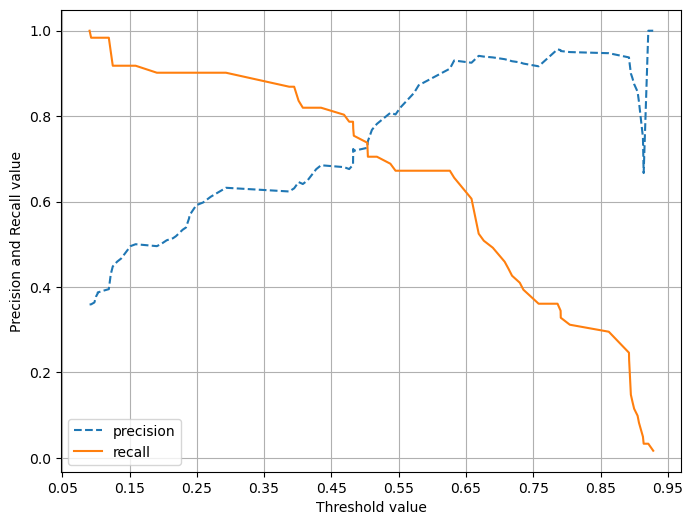

In [125]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
#     print(list(thresholds))
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
#     print(threshold_boundary)
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

### ROC 곡선과 AUC
- 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
- FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1_특이성(TNR), TPR은 재현율(민감도)를 나타냄
- TNR은 TN/(TN+FP)이며, FPR은 FP/(TN_FP)임
- ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값이 변화에 따른 TPR의 변화 값을 구함
- FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨
- FPR을 0으로 만드려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만드려면 임곗값을 0으로 지정하면 됨.

ROC 곡선(Receiver Operating Characteristic curve), AUC
- 분류 모델의 성능을 시각화하는 데 사용되는 그래프입니다.
- 이 그래프는 분류 모델의 임계값(threshold)을 변화시키면서, True Positive Rate(TPR)에 대한 FPR의 변화를 나타냅니다.
- FPR은 "False Positive Rate"의 약자로, 거짓 양성 비율을 나타내는 지표입니다. 
    - TPR = TP / (TP + FN)
    - FPR = FP / (FP + TN) = 1 - 특이도(TN/(FP + TN))
- FPR은 0부터 1까지의 값을 가지며, 분류 모델의 임계값에 따라 변화합니다. 
- 임계값이 낮을수록 모델은 더 많은 샘플을 양성으로 분류하며, 이로 인해 FPR은 증가합니다. 
- 임계값이 높을수록 모델은 더 많은 샘플을 음성으로 분류하며, FPR은 감소합니다.
- ROC 곡선은 FPR을 x축에, TPR(민감도, True Positive Rate)를 y축에 나타냅니다. 따라서 ROC 곡선은 임계값 변화에 따른 모델의 TPR과 FPR의 관계를 보여줍니다. 
- 좋은 분류 모델은 FPR이 낮은 상태에서 높은 TPR을 유지하는 곡선이 되어야 합니다. 
- ROC 곡선의 아래쪽 면적인 AUC(Area Under the Curve)는 분류 모델의 성능을 종합적으로 평가하는 지표로 사용됩니다. 
- AUC가 1에 가까울수록 모델의 성능이 우수하다고 판단할 수 있습니다.

### 과제 3_1517
타이타닉 데이터셋으로 모델링 한 후 ROC, AUC를 포함한 모든 분류 평가지표를 사용하여 평가를 수행하고 ROC AUC를 시각화하시오.